In [21]:
import pandas as pd
from prophet import Prophet

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

In [23]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [24]:
min_value = df['y'].min()  # Minimum değer
max_value = df['y'].max()  # Maksimum değer

In [25]:
df['cap'] = max_value * 1.1


In [26]:
m = Prophet(growth='logistic')
m.fit(df)

03:07:10 - cmdstanpy - INFO - Chain [1] start processing
03:07:11 - cmdstanpy - INFO - Chain [1] done processing


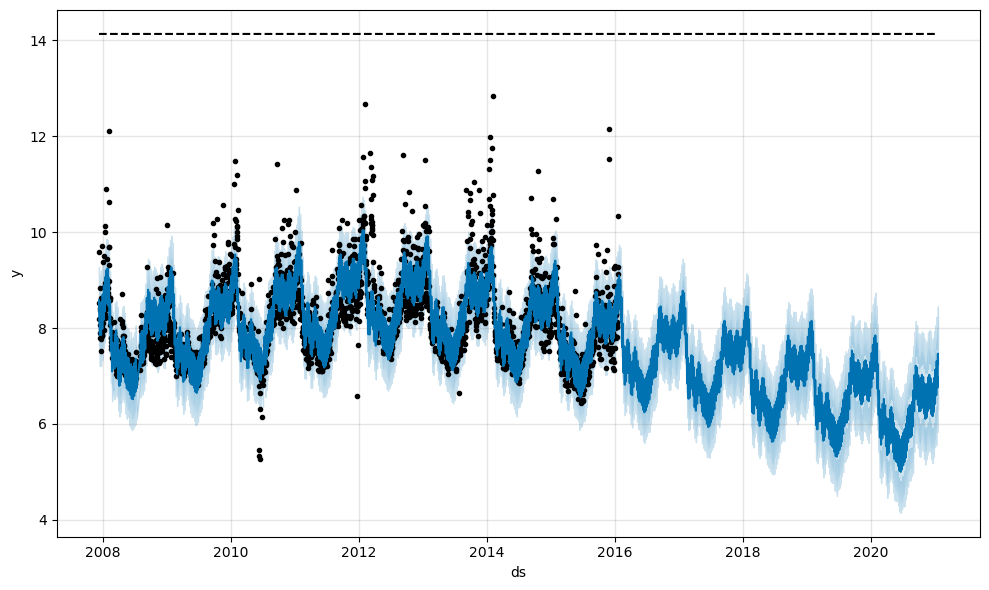

In [27]:
# Python
future = m.make_future_dataframe(periods=1826)
future['cap'] =  max_value * 1.1
fcst = m.predict(future)
fig = m.plot(fcst)

03:07:32 - cmdstanpy - INFO - Chain [1] start processing
03:07:33 - cmdstanpy - INFO - Chain [1] done processing


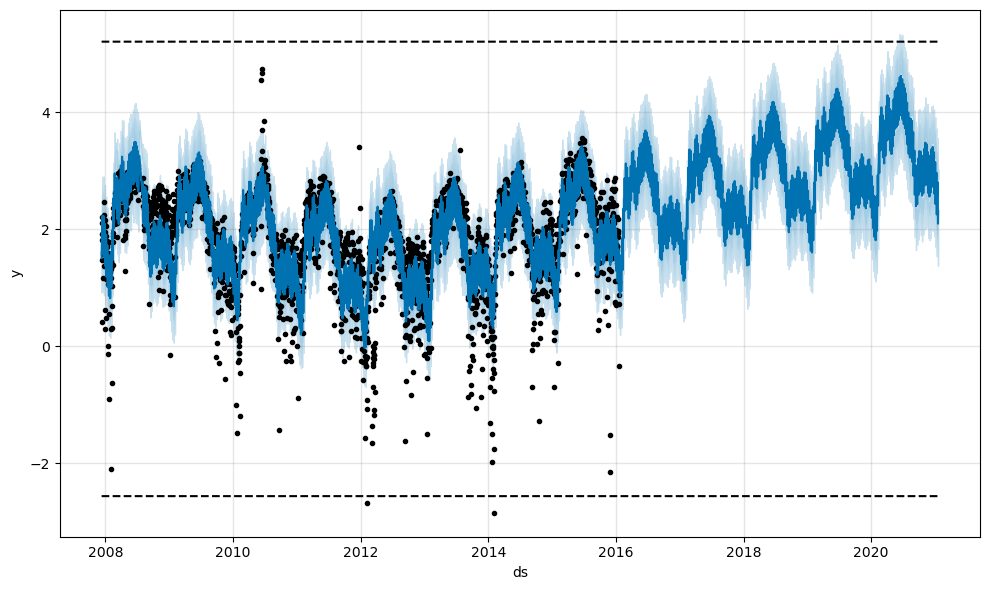

In [28]:
df['y'] = 10 - df['y']

new_max_value = df['y'].max()
new_min_value = df['y'].min()

df['cap'] =  new_max_value * 1.1
df['floor'] =  new_min_value * 0.9
future['cap'] = new_max_value * 1.1
future['floor'] = new_min_value * 0.9
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)